In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split

import keras
from keras.layers import Conv2D , Dense , Activation , MaxPool2D ,Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.

Using TensorFlow backend.


In [2]:
ds = pd.read_csv('C:/Users/vikas/Desktop/mljan19dwk/Datasets/fashion-mnist-test.csv')
ds.shape

(10000, 785)

In [3]:
ds = ds.values

In [4]:
X_train , X_test , Y_train , Y_test = train_test_split(ds[: , 1:] , ds[: , 0])
print(X_train.shape , X_test.shape , Y_train.shape , Y_test.shape)

(7500, 784) (2500, 784) (7500,) (2500,)


In [5]:
def plot_images(n):
    for i in range(n):
        plt.figure()
        plt.imshow(ds[i , 1:].reshape(28,28) , cmap='gray')
        plt.show()

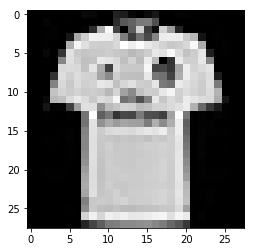

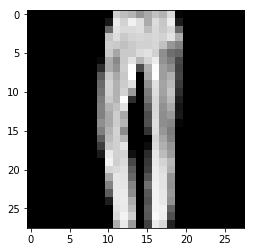

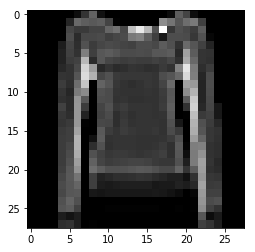

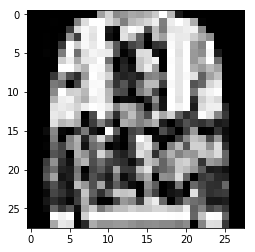

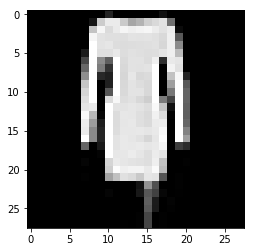

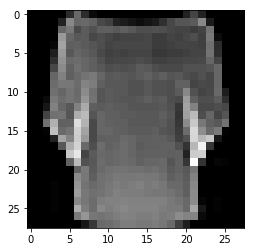

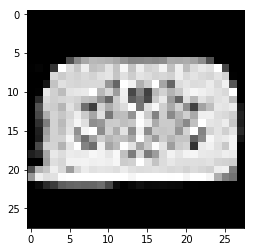

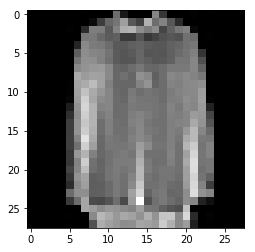

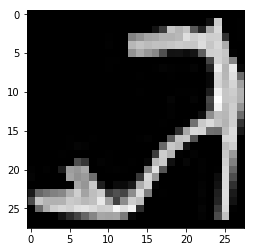

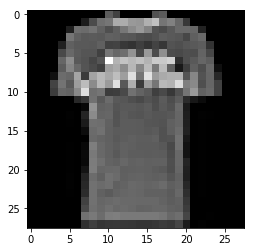

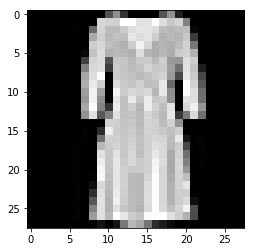

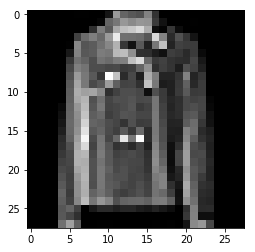

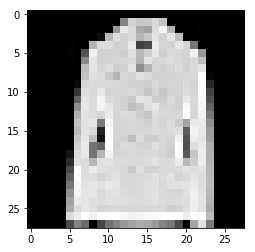

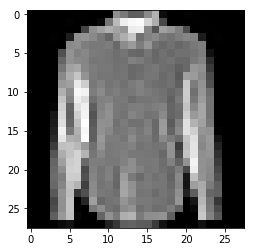

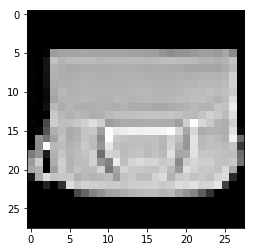

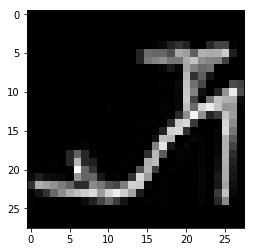

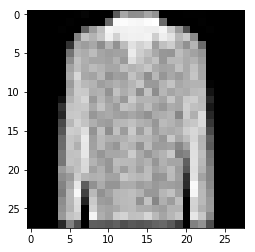

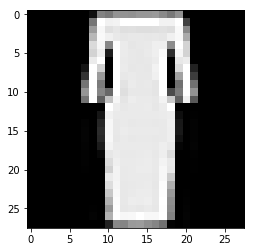

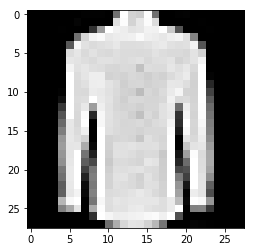

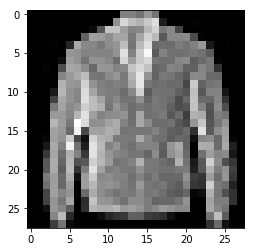

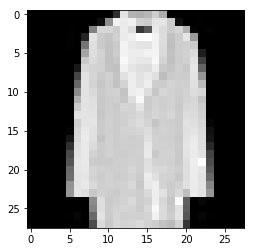

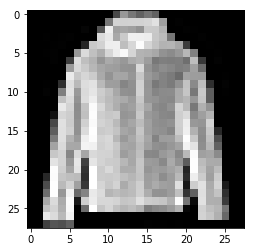

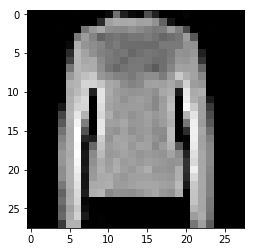

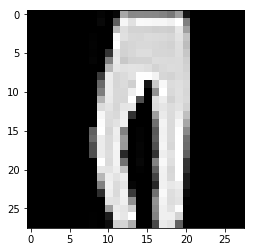

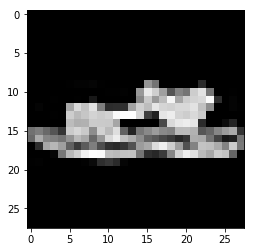

In [6]:
plot_images(25)

In [7]:
#Reshaping
X_train, X_test = X_train.reshape((-1,28,28,1)), X_test.reshape((-1,28,28,1))

In [8]:
print(X_train.shape , X_test.shape)

(7500, 28, 28, 1) (2500, 28, 28, 1)


In [9]:
#Converting to One_Hot_Vector
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print(Y_train.shape)
print(Y_test.shape)

(7500, 10)
(2500, 10)


In [10]:
model = Sequential()

model.add(Conv2D(3 , (3,3) , input_shape = (28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(5 , (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

W0222 13:27:29.787269  9808 module_wrapper.py:139] From c:\users\vikas\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0222 13:27:29.804223  9808 module_wrapper.py:139] From c:\users\vikas\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0222 13:27:29.813316  9808 module_wrapper.py:139] From c:\users\vikas\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0222 13:27:29.834266  9808 module_wrapper.py:139] From c:\users\vikas\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 3)         30        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 3)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 5)         140       
_________________________________________________________________
activation_2 (Activation)    (None, 11, 11, 5)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 5)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 125)               0         
__________

In [11]:
#Randomly Initializing Wights
model.compile(loss = 'categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

W0222 13:27:29.884159  9808 module_wrapper.py:139] From c:\users\vikas\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0222 13:27:29.915076  9808 module_wrapper.py:139] From c:\users\vikas\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
# Training
model.fit(X_train , Y_train,
         shuffle=True,
         epochs = 40,
         batch_size=128,
         validation_data=(X_test,Y_test))

W0222 13:27:30.013772  9808 deprecation.py:323] From c:\users\vikas\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0222 13:27:30.056767  9808 module_wrapper.py:139] From c:\users\vikas\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0222 13:27:30.131535  9808 module_wrapper.py:139] From c:\users\vikas\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W0222 13:27:30.195396  9808 module_wrapper.py:139] From c:\users\vikas\appdata\local\programs\python\python37\lib\site-packages\keras\backe

Train on 7500 samples, validate on 2500 samples
Epoch 1/40


W0222 13:27:34.344623  9808 module_wrapper.py:139] From c:\users\vikas\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0222 13:27:34.345653  9808 module_wrapper.py:139] From c:\users\vikas\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W0222 13:27:34.634396  9808 module_wrapper.py:139] From c:\users\vikas\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



7500/7500 [==============================] - 8s 1ms/step - loss: 1.6539 - acc: 0.4705 - val_loss: 1.2194 - val_acc: 0.6152
Epoch 2/40
7500/7500 [==============================] - 1s 68us/step - loss: 1.0304 - acc: 0.6741 - val_loss: 0.9097 - val_acc: 0.7008
Epoch 3/40
7500/7500 [==============================] - 0s 60us/step - loss: 0.8062 - acc: 0.7391 - val_loss: 0.7743 - val_acc: 0.7332
Epoch 4/40
7500/7500 [==============================] - 0s 53us/step - loss: 0.6959 - acc: 0.7681 - val_loss: 0.7022 - val_acc: 0.7576
Epoch 5/40
7500/7500 [==============================] - 0s 50us/step - loss: 0.6233 - acc: 0.7917 - val_loss: 0.6549 - val_acc: 0.7676
Epoch 6/40
7500/7500 [==============================] - 0s 49us/step - loss: 0.5773 - acc: 0.8017 - val_loss: 0.6274 - val_acc: 0.7740
Epoch 7/40
7500/7500 [==============================] - 0s 51us/step - loss: 0.5417 - acc: 0.8153 - val_loss: 0.6018 - val_acc: 0.7836
Epoch 8/40
7500/7500 [==============================] - 0s 50us/ste

In [15]:
weights = model.load_weights

In [16]:
print(weights)

<bound method Network.load_weights of <keras.engine.sequential.Sequential object at 0x0000023F5FB575C0>>


In [26]:
input_new = X_test[100].reshape(-1,28,28,1)
print(input_new.shape)

ans = model.predict(input_new)
print(ans , Y_test[100])
print(ans.argmax())

(1, 28, 28, 1)
[[7.6438308e-05 1.6671701e-06 9.9940729e-01 6.1712482e-05 2.9591893e-04
  3.8347284e-07 1.4891037e-04 6.0453209e-07 6.2433410e-06 8.0777380e-07]] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2
